<a href="https://colab.research.google.com/github/fgkdmn/deep_learning/blob/main/ANN_Uygulama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ARTIFICAL NEURAL NETWORK(ANN)**

1)Business Problem(İş Problemi)

2)Data Understanding(Veriyi Anlamak)

3)Data Preparation(Veriyi Hazırlama)

4)Modelling(Modelleme)

5)Evaluation(Değerlendirme)

#1)Business Problem(İş Problemi)

Problem:İnsan gücü kaynağını daha verimli kullanabilir miyiz?

Veri Seti: MNIST("Modified National Institute of standards and Technology")

#2)Data understanding(Veriyi anlamak)

In [ ]:
pip install tensorflow

In [72]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

In [73]:
# MNIST veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [76]:
print("Eğitim Seti Boyutu:" , x_train.shape, y_train.shape)

Eğitim Seti Boyutu: (60000, 28, 28) (60000,)


In [77]:
print("Test Seti Boyutu:" , x_test.shape, y_test.shape)

Test Seti Boyutu: (10000, 28, 28) (10000,)


In [78]:
num_labels = len(np.unique(y_train))

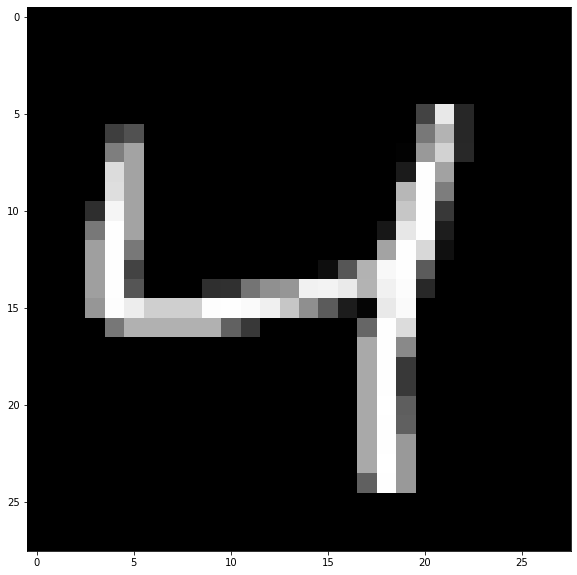

In [79]:
# Veri setinden Örnekler Gösterilmesi
plt.figure(figsize= (10,10))
plt.imshow(x_train[2], cmap="gray")

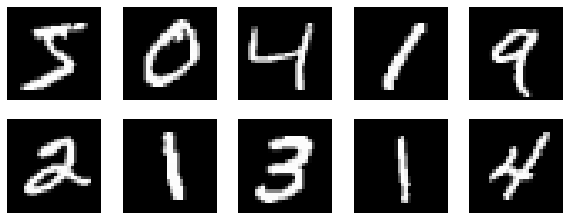

In [80]:
plt.figure(figsize= (10,10))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap= "gray")
  plt.axis("off")


In [81]:
#Fonksiyon olarak tanımlama
def visulaze_img(data):
  plt.figure(figsize= (10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap= "gray")
    plt.axis("off")

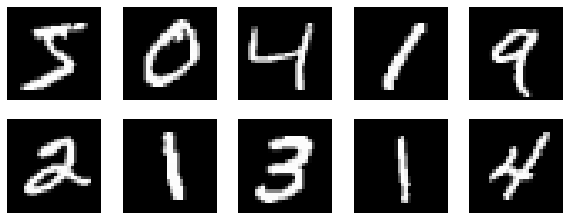

In [82]:
visulaze_img(x_train)

In [83]:
#RGB(0-255)
#Black(0) ------> White(255)


In [84]:
x_train[2].shape

(28, 28)

In [85]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [86]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [87]:
# Görseli oluşturan sayıları, görsel üzerine koymak için paylaşılan fonksiyon

In [88]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap= "gray")
  width, height = img.shape

  threshold = img.max() / 2.5
  
  for x in range (width):
    for y in range (height):

      ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                  color= "white" if img[x][y]<threshold else "black")

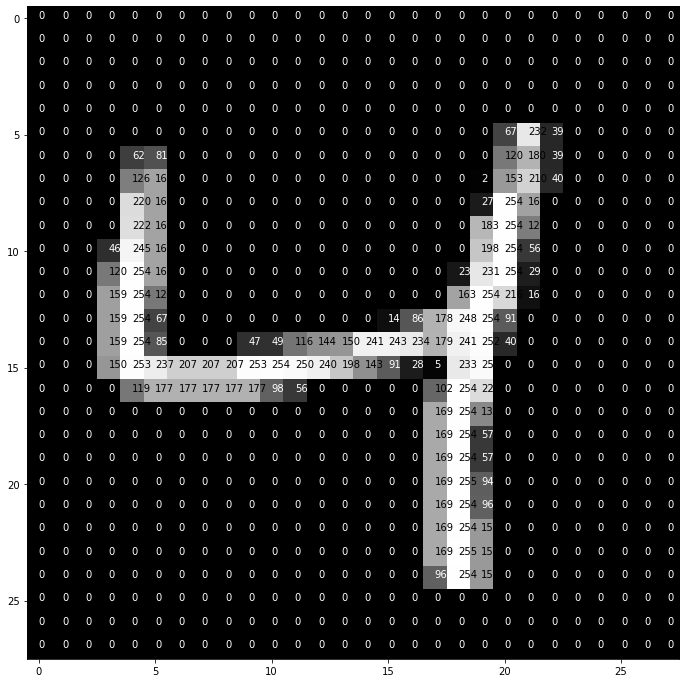

In [89]:
pixel_visualize(x_train[2])

#3)Data Preparation(Veriyi Hazırlama)

##Encoding

In [90]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [91]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [92]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

##Reshaping

In [93]:
image_size = x_train.shape[1]

In [94]:
image_size

28

In [97]:
print(f"x_train.shape{x_train.shape}")
print(f"x_test.shape{x_test.shape}")

x_train.shape(60000, 28, 28)
x_test.shape(10000, 28, 28)


In [98]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


print(f"x_train.shape{x_train.shape}")
print(f"x_test.shape{x_test.shape}")


x_train.shape(60000, 28, 28, 1)
x_test.shape(10000, 28, 28, 1)


##Standardization

In [99]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#4)Modelling(Modelleme)

##Sinir ağı mimarisi tanımlamak

In [103]:
# layer1 katmanında units=128 seçilme nedeni yaygın kullanım olduğundan dolayı bu şekilde seçilmiştir. Farklı değerler denenebilir.
# Aktivasyon fonksiyonu seçimlerinde ise gizli katmanda(hidden layer) kullanılması gereken fonksiyon "relu" fonksiyonudur.
# output_layer(Çıktı katmanı) katmanında ise çok sınıflı bir sınıfladırma görevimiz olduğundan dolayı aktivasyon fonksiyonu "softmax" seçilmiştir.
# Eğer iki sınıflı bir sınıflandırma projesi olsaydı o zaman "sigmoid" fonksiyonu seçilirdi.

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation="relu" , name= "layer1"),
    Dense(units=num_labels, activation="softmax", name="output_layer")])


# Optimize edilmesi gereken kayıp fonksiyonu(loss) çok sınıflı bir sınıflandırma problemi olduğu için "categorical_crossentropy" seçilmiştir.
# Optimize edilmesi gereken kayıp fonksiyonunu minimize edecek algoritma "adam" seçilmiştir. Farklı algoritmalar denenebilir.
# loss fonksiyonunu minimize ederken gideceğimiz yönü hata metriklerine bakarak belirleyebiliriz.
# Yapmış olduğumuz sınıflandırmanın başarısını birkaç metrikle birlikte değerlendirmiş olucağız.
# Başarı değerlendirme metrikleri ise "Precision", "RECALL" ve "Accuracyy" 

model.compile(loss= "categorical_crossentropy",
              optimizer= "adam",
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [107]:
# epochs optimizasyon,iterasyon sayısı olarak düşünülebilir, epochs=10 yaklaşık olarak belirlendi, farklı epochs sayıları verilerek başarı tekrar değerlendirilebilir.
# batch_size=128 ise optimizasyon işlemleri sırasında gradyan hesaplarında veri setindeki bütün gözlem birimlerimi her epoch da göz önünde mi bulundurulsun?
# Yoksa belirli sayıda alt küme seçelim rastgele bu alt küme üzerinden ağırlık güncellemeleri mi gerçekleştirsin?
# Sorularına yanıt olarak "batch size= 128" girilmiş.
# Yani her iterasyonda 128 tane gözlem birimine odaklanarak ilgili optimizasyon yöntemine dayalı olarak gradyanlar,türevler hesaplanacak ve bir sonraki "epoch" a geçilecek.

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0262 - precision_1: 0.9942 - recall_1: 0.9917 - accuracy: 0.9930 - val_loss: 0.0713 - val_precision_1: 0.9793 - val_recall_1: 0.9766 - val_accuracy: 0.9781
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0223 - precision_1: 0.9951 - recall_1: 0.9932 - accuracy: 0.9943 - val_loss: 0.0702 - val_precision_1: 0.9803 - val_recall_1: 0.9773 - val_accuracy: 0.9782
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0189 - precision_1: 0.9960 - recall_1: 0.9948 - accuracy: 0.9954 - val_loss: 0.0722 - val_precision_1: 0.9793 - val_recall_1: 0.9770 - val_accuracy: 0.9782
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0158 - precision_1: 0.9969 - recall_1: 0.9956 - accuracy: 0.9963 - val_loss: 0.0750 - val_precision_1: 0.9805 - val_recall_1: 0.9773 - val_accuracy: 0.9781
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss

#5)Evaluation( Model Başarısını Değerlendirme)

In [108]:
history= model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0054 - precision_1: 0.9992 - recall_1: 0.9990 - accuracy: 0.9991 - val_loss: 0.0822 - val_precision_1: 0.9810 - val_recall_1: 0.9789 - val_accuracy: 0.9795
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0059 - precision_1: 0.9991 - recall_1: 0.9988 - accuracy: 0.9990 - val_loss: 0.0893 - val_precision_1: 0.9795 - val_recall_1: 0.9781 - val_accuracy: 0.9785
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0048 - precision_1: 0.9992 - recall_1: 0.9991 - accuracy: 0.9992 - val_loss: 0.0819 - val_precision_1: 0.9804 - val_recall_1: 0.9784 - val_accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0030 - precision_1: 0.9998 - recall_1: 0.9998 - accuracy: 0.9998 - val_loss: 0.0804 - val_precision_1: 0.9811 - val_recall_1: 0.9797 - val_accuracy: 0.9802
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss

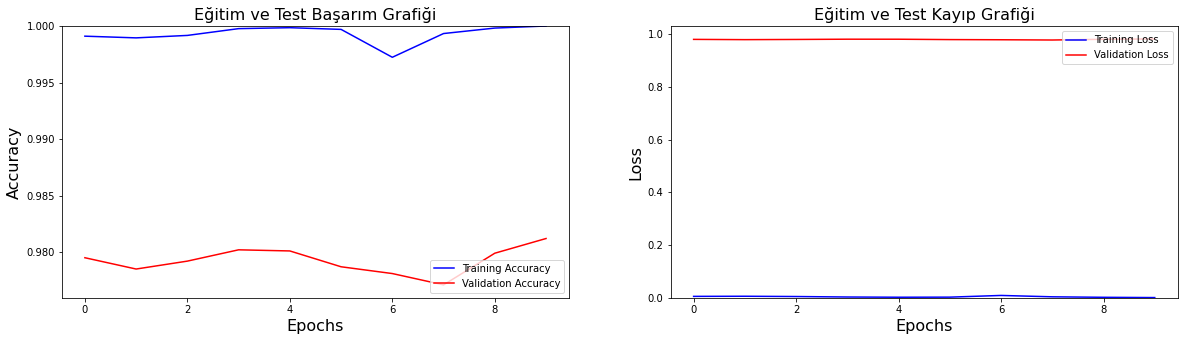

In [112]:
#############################
# Accuracy ve Loss Grafikleri
#############################

#---------------------------- Grafik 1 Accuracy ----------------------------

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color="b", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title("Eğitim ve Test Başarım Grafiği", fontsize=16)

#---------------------------- Grafik 2 Loss ----------------------------

plt.subplot(1,2,2)
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_accuracy"], color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Eğitim ve Test Kayıp Grafiği", fontsize=16)
plt.show()



In [115]:
loss, precision, recall, acc = model.evaluate(x_test,y_test, verbose=False)
print("Test Accuracy: %.1f%%" % (100.0 * acc))
print("Test Loss: %.1f%%" % (100.0 * loss))
print("Test Precision: %.1f%%" % (100.0 * precision))
print("Test Recall: %.1f%%" % (100.0 * recall))

Test Accuracy: 97.9%
Test Loss: 11.8%
Test Precision: 97.9%
Test Recall: 97.8%


# Modelin Kaydedilmesi ve Tahmin için Kullanılması

In [116]:
model.save("mnsit_model.h5")

In [118]:
import random

random = random.randint(0, x_test.shape[0])

In [119]:
random

6801

In [120]:
test_image = x_test[random]

In [121]:
y_test[random]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

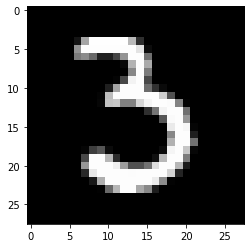

In [122]:
plt.imshow(test_image.reshape(28,28), cmap="gray")

In [129]:
test_data = x_test[random].reshape(1,28,28,1)

probability=model.predict(test_data)

1/1 [==============================] - 0s 24ms/step


In [130]:
probability

array([[8.4467731e-24, 1.3205011e-15, 7.9213711e-16, 1.0000000e+00,
        1.4169203e-34, 9.4007766e-13, 2.9190330e-27, 2.9549662e-25,
        1.6685232e-17, 9.0510028e-18]], dtype=float32)

In [131]:
predicted_classes = np.argmax(probability)

In [132]:
predicted_classes

3

In [137]:
print(f"Tahmin Edilen Sınıf: {predicted_classes}")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=-1))[0]}")
print(f"Diğer Sınıfların Olasılık Değerleri: {probability} ")


Tahmin Edilen Sınıf: 3
Tahmin Edilen Sınıfın Olasılık Değeri: 1.0
Diğer Sınıfların Olasılık Değerleri: [[8.4467731e-24 1.3205011e-15 7.9213711e-16 1.0000000e+00 1.4169203e-34
  9.4007766e-13 2.9190330e-27 2.9549662e-25 1.6685232e-17 9.0510028e-18]] 
